In [2]:
import numpy as np
import nibabel as nib
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [12]:
def load_nifti_image(file_path):
    img = nib.load(file_path)
    data = img.get_fdata()
    return data



In [9]:
# Example usage:
# Load MRI images
image_paths = ['15 T1_se_mapping_TR250.nii', '16 T1_se_mapping_TR500.nii', '17 T1_se_mapping_TR1000.nii']
images = [load_nifti_image(path) for path in image_paths]

# Define TR values (in milliseconds)
TR_values = [250, 500, 1000]

In [10]:
print(images[0].shape)

(256, 64, 1)


[31.0, 80.0, 161.0] [ 250  500 1000]
Curve Fitting
[ 250.  500. 1000.] 1500.0
[0.84648172 0.71653131 0.51341712]
[ 250.  500. 1000.] 1500.0000223517418
[0.84648173 0.71653131 0.51341712]
[ 250.  500. 1000.] 1000.4126544754465
[0.7788811  0.60665576 0.36803122]
[ 250.  500. 1000.] 1000.4126693827567
[0.7788811  0.60665577 0.36803122]
[ 250.  500. 1000.] 1000.0000005064006
[0.77880078 0.60653066 0.36787944]
[ 250.  500. 1000.] 1000.0000154075618
[0.77880079 0.60653066 0.36787945]
[ 250.  500. 1000.] 1000.0000000000001
[0.77880078 0.60653066 0.36787944]
[ 250.  500. 1000.] 1000.0000149011613
[0.77880079 0.60653066 0.36787945]
Printing Popt:  [1000.]
Fitting [1000.]
[   0.           10.1010101    20.2020202    30.3030303    40.4040404
   50.50505051   60.60606061   70.70707071   80.80808081   90.90909091
  101.01010101  111.11111111  121.21212121  131.31313131  141.41414141
  151.51515152  161.61616162  171.71717172  181.81818182  191.91919192
  202.02020202  212.12121212  222.22222222  23

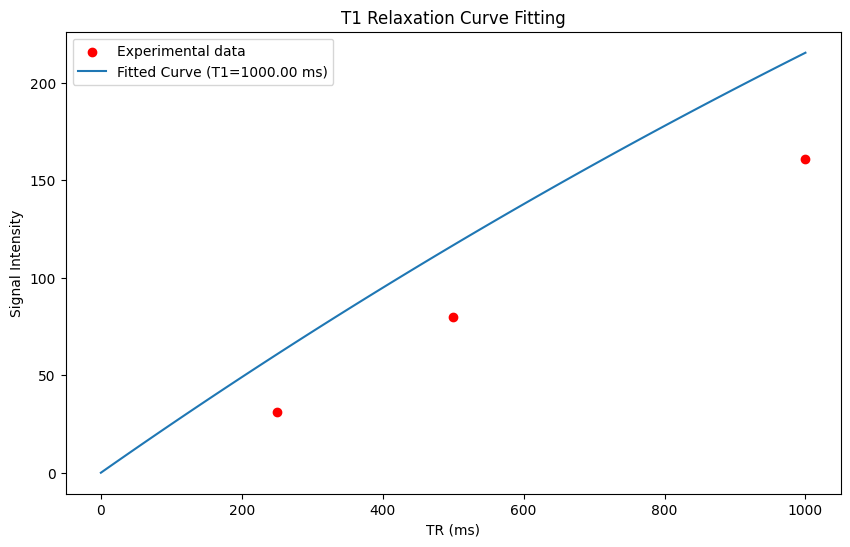

In [33]:
def signal_intensity_function(TR, T1):
    print(TR,T1)
    print(np.exp(-TR/T1))
    return (1 - np.exp(-TR / T1))

def calculate_T1_map(images, TR_values):
    # Initialize T1 map with zeros
    T1_map = np.zeros(images[0].shape)
    S0_map = np.zeros(images[0].shape)
    
    # Vectorize the TR values
    TR_values = np.array(TR_values)
    
    # Iterate over each voxel in the single slice
    for i in range(images[0].shape[0]):
        for j in range(images[0].shape[1]):
            # Get the signal intensities for this voxel
            signal_intensities = np.array([img[128, 25] for img in images]).flatten().tolist()
            
            # signal_intensities.insert(0, 0)
            # TR_values = TR_values.tolist()
            # TR_values.insert(0,0)
            
            print(signal_intensities, TR_values)
            
            # Fit the signal intensity data to the exponential model
            try:
                print("Curve Fitting")
                popt, _ = curve_fit(signal_intensity_function, TR_values, signal_intensities, p0 = [1500], bounds=(1000, 6000))
                print("Printing Popt: ", popt)
                T1 = popt
            except RuntimeError:
                T1 = 0

            T1_map[i, j] = T1
            TR_values_for_plot = np.linspace(0, max(TR_values), 100)
            print("Fitting", T1)
            fitted_signals = signal_intensity_function(TR_values_for_plot, 3000)*760
            plt.figure(figsize=(10, 6))
            plt.scatter(TR_values, signal_intensities, color='red', label='Experimental data')
            plt.plot(TR_values_for_plot, fitted_signals, label=f'Fitted Curve (T1={T1[0]:.2f} ms)')
            plt.title('T1 Relaxation Curve Fitting')
            plt.xlabel('TR (ms)')
            plt.ylabel('Signal Intensity')
            plt.legend()
            plt.show()
            break
        break
    
    return T1_map

# Calculate T1 map
T1_map = calculate_T1_map(images, TR_values)

(256, 64, 1)


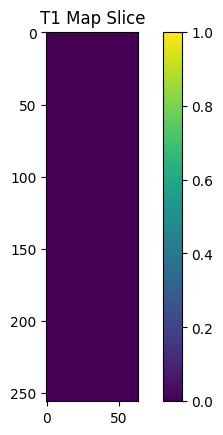

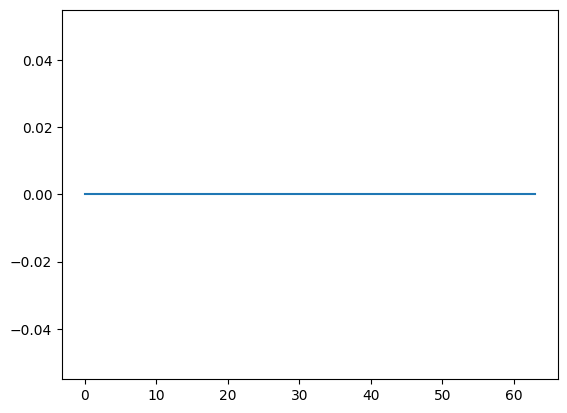

In [49]:
# Visualize a slice of the T1 map
print(T1_map.shape)
plt.imshow(T1_map[:, :, 0])
plt.colorbar()
plt.title('T1 Map Slice')
plt.show()

plt.plot(T1_map[129,0:64,0])
plt.show()